In [1]:
import logging
import pickle

import numpy as np
from sklearn.decomposition import PCA
import joblib
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process import kernels
from sklearn.preprocessing import StandardScaler

from src import cachedir, lazydict, observables, data_list, emulator
from src.design import Design

import matplotlib.pyplot as plt

In [2]:
# cachefile1 = 'result/STAT20221012ExponentialRBF_GoodPCAN10/HeavyIon.pkl'
cachefile1 = 'result/STAT20221012ExponentialRBF_N15_Smoothed/HeavyIon.pkl'
cachefile2 = 'result/STAT20221012ExponentialRBF_N10/HeavyIon.pkl'

Emulator1 = emulator.Emulator.from_cache_custom('HeavyIon', cachefile1)
Emulator2 = emulator.Emulator.from_cache_custom('HeavyIon', cachefile2)

In [3]:
Emulator1.pca.components_.shape[0]

95

In [4]:
Emulator2.pca.components_.shape

(95, 729)

In [5]:
N1 = Emulator1.pca.components_.shape[0]
N2 = Emulator2.pca.components_.shape[0]

Correlation = np.zeros((N1, N2))

for i in range(0, N1):
    for j in range(0, N2):
        Correlation[i, j] = np.sum(Emulator1.pca.components_[i,:] * Emulator2.pca.components_[j,:])

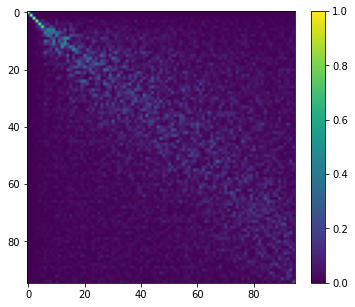

In [6]:
fig, ax = plt.subplots(figsize=(6, 5))
pos = ax.imshow(np.abs(Correlation), vmin = 0, vmax = 1, aspect = 'auto')
fig.colorbar(pos, ax = ax)

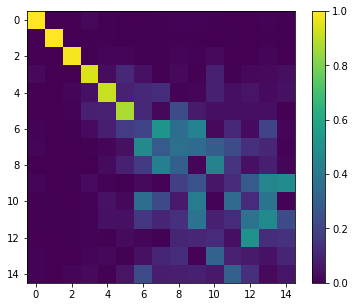

In [7]:
fig, ax = plt.subplots(figsize=(6, 5))
pos = ax.imshow(np.abs(Correlation[0:15,0:15]), vmin = 0, vmax = 1, aspect = 'auto')
fig.colorbar(pos, ax = ax)

In [8]:
plt.close('all')